In [2]:
# Import our dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import our input dataset
Merged_2015_2020_df = pd.read_csv("Resources/Merged_2015_2020.csv")
Merged_2015_2020_df.head()

,State,colonies,Maximum_colonies1,Lost_colonies,Percent_lost2,Added_colonies,Renov_colonies3,Percent_renov4,Year,Qtr,Varroa_mites,Other_parasites,Diseases,Pestticides,Other3,Unknown
0,AL,7000,7000,1800,26,2800,250,4,2015,Q1,10.0,5.4,0.0,2.2,9.1,9.4
1,AZ,35000,35000,4600,13,3400,2100,6,2015,Q1,26.9,20.5,0.1,0.0,1.8,3.1
2,AR,13000,14000,1500,11,1200,90,1,2015,Q1,17.6,11.4,1.5,3.4,1.0,1.0
3,CA,1440000,1690000,255000,15,250000,124000,7,2015,Q1,24.7,7.2,3.0,7.5,6.5,2.8
4,CO,3500,12500,1500,12,200,140,1,2015,Q1,14.6,0.9,1.8,0.6,2.6,5.9


In [4]:
Merged_2015_2020_df['YQ']= Merged_2015_2020_df[['Year', 'Qtr']].apply(lambda x: '-'.join(x.values.astype(str)), axis='columns')

In [5]:
Merged_2015_2020_df.head()

,State,colonies,Maximum_colonies1,Lost_colonies,Percent_lost2,Added_colonies,Renov_colonies3,Percent_renov4,Year,Qtr,Varroa_mites,Other_parasites,Diseases,Pestticides,Other3,Unknown,YQ
0,AL,7000,7000,1800,26,2800,250,4,2015,Q1,10.0,5.4,0.0,2.2,9.1,9.4,2015-Q1
1,AZ,35000,35000,4600,13,3400,2100,6,2015,Q1,26.9,20.5,0.1,0.0,1.8,3.1,2015-Q1
2,AR,13000,14000,1500,11,1200,90,1,2015,Q1,17.6,11.4,1.5,3.4,1.0,1.0,2015-Q1
3,CA,1440000,1690000,255000,15,250000,124000,7,2015,Q1,24.7,7.2,3.0,7.5,6.5,2.8,2015-Q1
4,CO,3500,12500,1500,12,200,140,1,2015,Q1,14.6,0.9,1.8,0.6,2.6,5.9,2015-Q1


In [36]:
Merged_2015_2020_df['YQ_codes']=Merged_2015_2020_df.YQ.astype('category').cat.codes

In [37]:
Merged_2015_2020_df.head()

,State,colonies,Maximum_colonies1,Lost_colonies,Percent_lost2,Added_colonies,Renov_colonies3,Percent_renov4,Year,Qtr,Varroa_mites,Other_parasites,Diseases,Pestticides,Other3,Unknown,YQ,YQ-codes,YQ_codes
0,AL,7000,7000,1800,26,2800,250,4,2015,Q1,10.0,5.4,0.0,2.2,9.1,9.4,2015-Q1,0,0
1,AZ,35000,35000,4600,13,3400,2100,6,2015,Q1,26.9,20.5,0.1,0.0,1.8,3.1,2015-Q1,0,0
2,AR,13000,14000,1500,11,1200,90,1,2015,Q1,17.6,11.4,1.5,3.4,1.0,1.0,2015-Q1,0,0
3,CA,1440000,1690000,255000,15,250000,124000,7,2015,Q1,24.7,7.2,3.0,7.5,6.5,2.8,2015-Q1,0,0
4,CO,3500,12500,1500,12,200,140,1,2015,Q1,14.6,0.9,1.8,0.6,2.6,5.9,2015-Q1,0,0


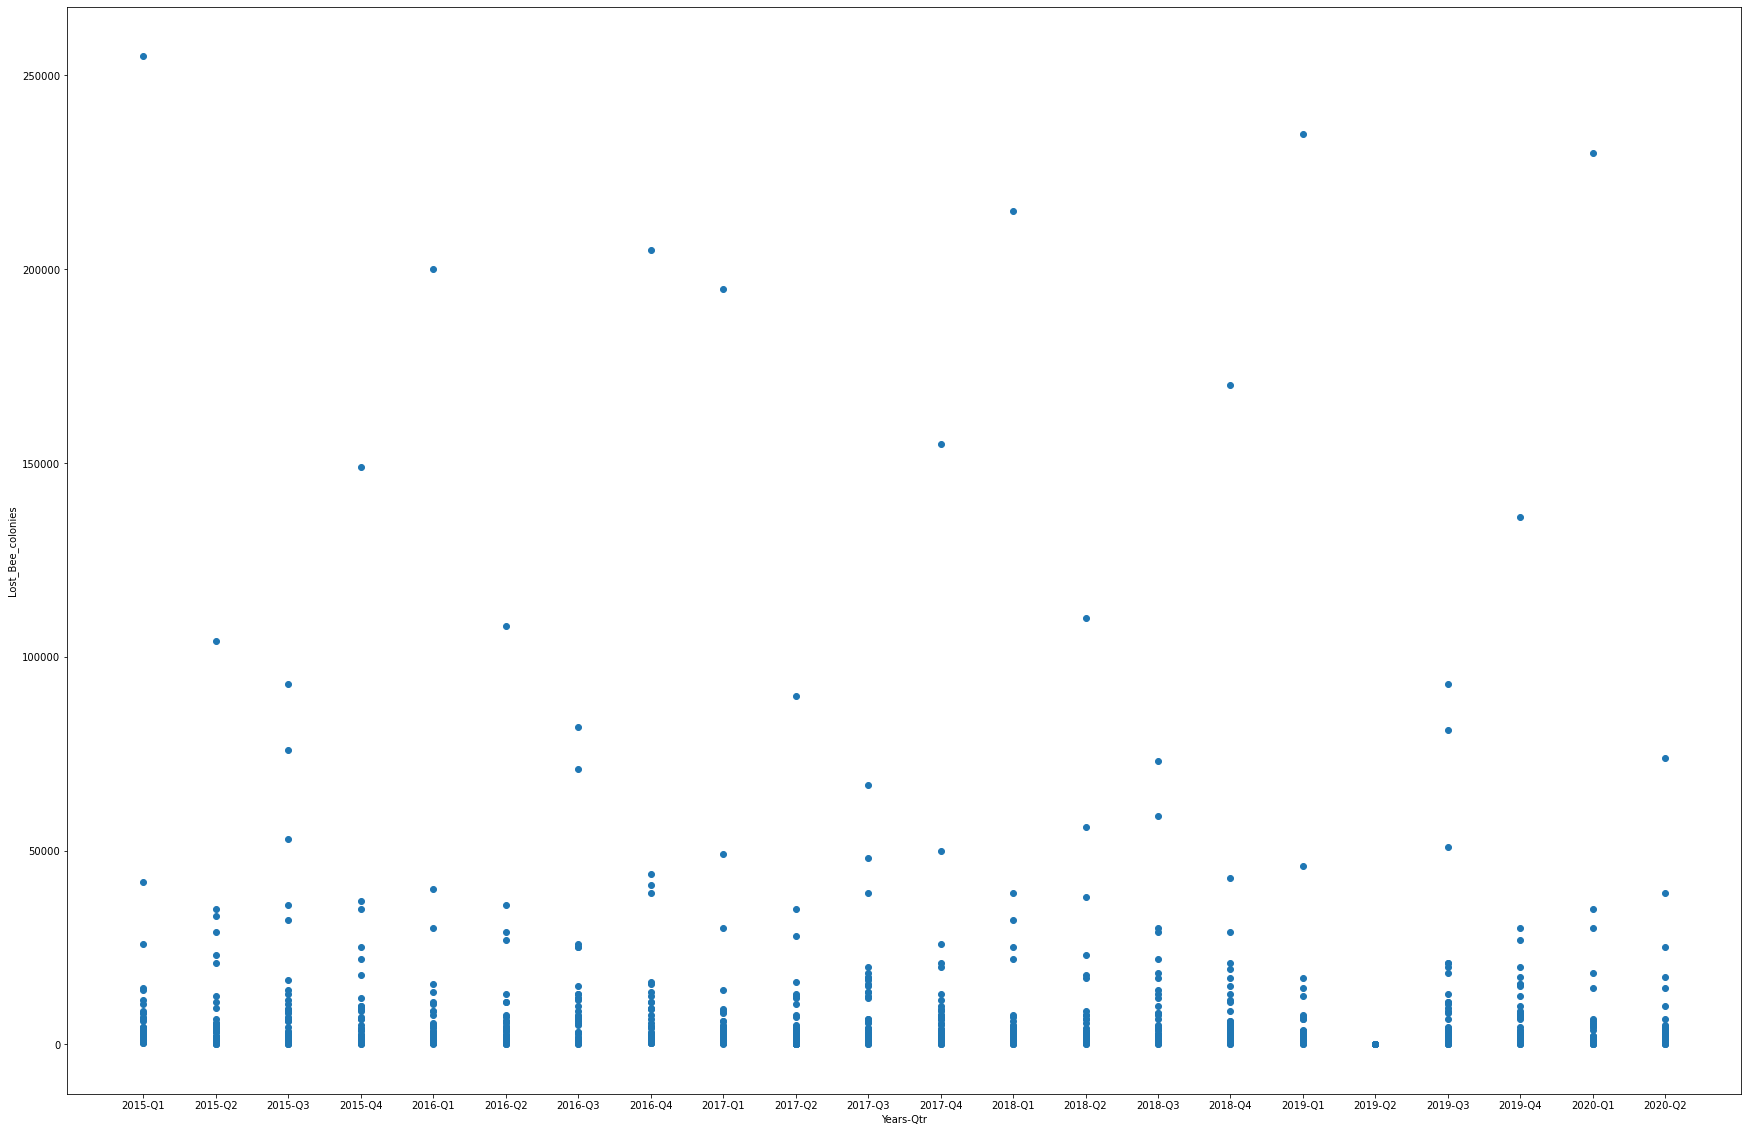

In [12]:
# Visually inspect the relationship of Year and Lost Colonies
plt.figure(figsize=(30,20))
plt.scatter(Merged_2015_2020_df.YQ, Merged_2015_2020_df.Lost_colonies)
plt.xlabel('Years-Qtr')
plt.ylabel('Lost_Bee_colonies')
plt.show()


In [38]:
#  formats the data to meet the requirements of the Scikit-learn library
X = Merged_2015_2020_df.YQ_codes.values.reshape(-1, 1)

In [39]:
# Examine the first five entries 
X[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=int8)

In [40]:
# Examine the shape
X.shape

(1012, 1)

In [41]:
# Assign the target variable
y = Merged_2015_2020_df.Lost_colonies

In [42]:
# Create a linear regression model instance
model = LinearRegression()

In [43]:
# Learning stage, ie. fitting or training
model.fit(X, y)

LinearRegression()

In [44]:
# Use predict method to generate predictions
y_pred = model.predict(X)
print(y_pred.shape)

(1012,)


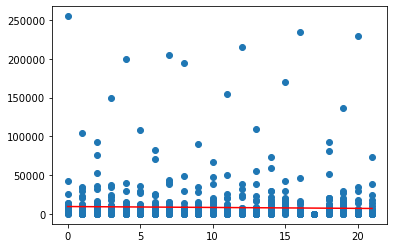

In [45]:
# plot the predictions as a red line against the data points
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [46]:
#  examine the specific parameters of our model: the slope and 
# the y-intercept. The slope is represented by model.coef_, and model.intercept_ is the y-intercep.
print(model.coef_)
print(model.intercept_)

[-118.86836226]
9529.827289912357
